## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor

## Loading Data

In [2]:
stock_trn = pd.read_csv("C:/Users/ASUS/Downloads/stocknet_trn_data.csv")
stock_trn_targets = pd.read_csv("C:/Users/ASUS/Downloads/stocknet_trn_data_targets.csv",header=None)
stock_test = pd.read_csv("C:/Users/ASUS/Downloads/stocknet_tst_data.csv")

## Data Analysis

In [3]:
stock_trn_targets.columns=["labels","Close"]

In [4]:
print (stock_trn.shape)

(97732, 4)


In [5]:
print (stock_trn.columns)

Index(['Open', 'High', 'Low', 'Volume'], dtype='object')


In [6]:
stock_trn.head()

,Open,High,Low,Volume
0,75.430000,75.910004,75.139999,3436700.0
1,124.930000,124.940002,124.169998,2366700.0
2,84.339996,84.370003,82.370003,11338700.0
3,56.770000,57.150002,56.529999,413300.0
4,47.419998,48.090000,46.759998,9531100.0


In [7]:
con = pd.concat([stock_trn,stock_trn_targets],axis=1)

In [8]:
print(con.head())

         Open        High         Low      Volume labels       Close
0   75.430000   75.910004   75.139999   3436700.0     d1   75.650002
1  124.930000  124.940002  124.169998   2366700.0     d2  124.449997
2   84.339996   84.370003   82.370003  11338700.0     d3   82.660004
3   56.770000   57.150002   56.529999    413300.0     d4   57.009998
4   47.419998   48.090000   46.759998   9531100.0     d5   47.860001


In [9]:
df=con.drop(['labels'],axis=1)
print(df.head())

         Open        High         Low      Volume       Close
0   75.430000   75.910004   75.139999   3436700.0   75.650002
1  124.930000  124.940002  124.169998   2366700.0  124.449997
2   84.339996   84.370003   82.370003  11338700.0   82.660004
3   56.770000   57.150002   56.529999    413300.0   57.009998
4   47.419998   48.090000   46.759998   9531100.0   47.860001


In [10]:
df.isnull().sum()

Open      3
High      3
Low       3
Volume    3
Close     3
dtype: int64

In [11]:
df[:] = np.nan_to_num(df)

In [12]:
df.isna().any()

Open      False
High      False
Low       False
Volume    False
Close     False
dtype: bool

In [13]:
df.describe()

,Open,High,Low,Volume,Close
count,97732.000000,97732.000000,97732.000000,9.773200e+04,97732.000000
mean,2427.586821,2439.482544,2413.891123,9.064503e+06,2427.307257
std,21797.511538,21900.008679,21677.678068,1.800890e+07,21794.418262
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,40.450001,40.730000,40.169998,1.197900e+06,40.459999
50%,65.955738,66.486092,65.454567,3.544400e+06,66.009147
75%,97.669998,98.470001,96.925177,8.995725e+06,97.669998
max,272800.000000,272885.000000,271040.000000,6.166205e+08,271062.000000


<AxesSubplot:xlabel='Close', ylabel='Open'>

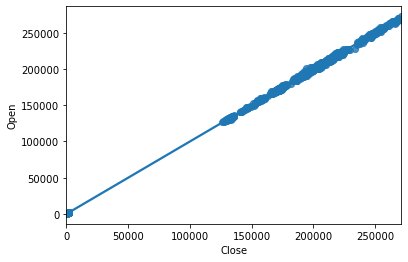

In [14]:
sns.regplot(x='Close',y='Open',data=df)

<AxesSubplot:>

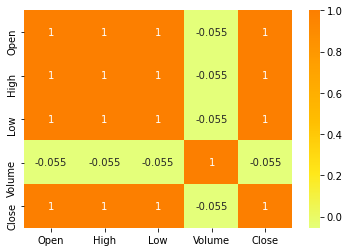

In [15]:
corr=df.corr()
sns.heatmap(corr,cmap='Wistia',annot=True)

## Splitting Data

In [16]:
X = df.drop(labels=['Close'],axis=1)
y = df['Close']

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 42)
print(f"size of train data = {x_train.shape}\nsize of test set = {x_test.shape}")

size of train data = (87958, 4)
size of test set = (9774, 4)


## Linear Regression

In [18]:
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x_train, y_train)
# Predict
y_predicted = regression_model.predict(x_test)

# model evaluation
rmse = math.sqrt(mean_squared_error(y_test, y_predicted))
mae = mean_absolute_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('Mean absolute error:', mae)
print('R2 score: ', r2)


Intercept: -0.07566590462010936
Root mean squared error:  62.64671909354833
Mean absolute error: 5.530952340269285
R2 score:  0.999991162349729


In [30]:
#saving the labels
pred_orig=regression_model.predict(stock_test)
labels = open("Aakash_Kumar_Label_file.txt", "w+")
for i in range(len(pred_orig)):
    labels.write(str("d")+str(int(i))+","+str(pred_orig[i]) + "\n")

## KNN Regressor

In [19]:
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    rmse = math.sqrt(mean_squared_error(y_test,pred))
    mae = mean_absolute_error(y_test,pred)
    r2 = r2_score(y_test,pred)
    rmse_val.append(rmse) #store rmse values
    print('RMSE value for k= ' , K , 'is:', rmse)
    print('Mean absolute error:', mae)
    print('R2 score: ', r2)

RMSE value for k=  1 is: 139.58571952204107
Mean absolute error: 42.64897012359321
R2 score:  0.9999561244950136
RMSE value for k=  2 is: 138.76590070470888
Mean absolute error: 42.841716765398004
R2 score:  0.9999566383632634
RMSE value for k=  3 is: 128.6081912029598
Mean absolute error: 43.56257363743946
R2 score:  0.99996275419122
RMSE value for k=  4 is: 135.42800978583935
Mean absolute error: 45.59194521685083
R2 score:  0.9999586993257853
RMSE value for k=  5 is: 139.97261981456433
Mean absolute error: 47.06809531289134
R2 score:  0.9999558809318205
RMSE value for k=  6 is: 142.7909907572938
Mean absolute error: 48.31669113638224
R2 score:  0.9999540863559665
RMSE value for k=  7 is: 152.0268293275257
Mean absolute error: 49.86625883385952
R2 score:  0.9999479548068291
RMSE value for k=  8 is: 152.744902251315
Mean absolute error: 50.64128908297524
R2 score:  0.9999474619924368
RMSE value for k=  9 is: 150.91678794661095
Mean absolute error: 51.352956707421036
R2 score:  0.99994

<AxesSubplot:>

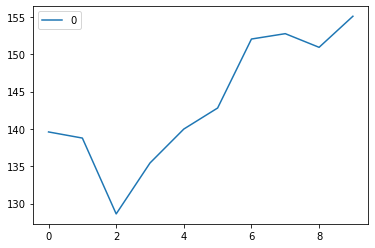

In [20]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

## Implementing GridsearchCV
For deciding the value of k, plotting the elbow curve every time is be a cumbersome and tedious process. You can simply use gridsearch to find the best value.

In [21]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 2}

## Random Forest Regression

In [22]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 85, random_state = 0)

# Fitting the Random Forest Regression model to the data
model.fit(x_train, y_train) 

# Predicting the target values of the test set
y_pred = model.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("\nRMSE:\n",rmse)
print('Mean absolute error:', mae)
print('R2 score: ', r2)


RMSE:
 96.254
Mean absolute error: 8.111179462557885
R2 score:  0.9999791370841782


## Implementing GridsearchCV

In [23]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
n_estimators=np.arange(5,100,20)
param_grid = {'n_estimators': n_estimators,'max_depth': [10, 50, None], 'bootstrap': [True, False]}
model = GridSearchCV(estimator = rf,param_grid=param_grid, cv = 5, verbose=2, n_jobs = -1)
model.fit(x_train,y_train)
model.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'bootstrap': True, 'max_depth': 10, 'n_estimators': 45}

## SVR

In [24]:
from sklearn.svm import SVR
# create the model object
regressor = SVR(kernel = 'rbf')
# fit the model on the data
regressor.fit(x_train, y_train)

SVR()

In [25]:
y_pred=regressor.predict(x_test)
print(y_pred)

[67.90353925 68.27483306 43.88177833 ... 34.1207714  68.4617715
 74.25886222]


In [26]:
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test,pred)
r2 = r2_score(y_test,pred)

print('RMSE:',rmse)
print('Mean absolute error:', mae)
print('R2 score: ', r2)

RMSE: 21196.352047709563
Mean absolute error: 52.474790198004904
R2 score:  0.9999458446028021
